In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [25]:
df = pd.read_csv("results.csv")
df = df.sort_values(by="growing_text_size")
df.head()

,algorithm,base_text,growing_text,base_text_size,growing_text_size,time,space
0,memo,a_story_of_a_little_pet_bear,gift_of_the_magi,10,10,166289,NaN
13502,dpopt,a_story_of_a_little_pet_bear,invention_of_a_new_religion,10,10,673,NaN
98700,memo,raven,gift_of_the_magi,10,10,129131,NaN
98701,dp,raven,gift_of_the_magi,10,10,3607,NaN
98702,dpopt,raven,gift_of_the_magi,10,10,569,NaN


In [26]:
aggregated = df.groupby(
    ["algorithm", "base_text", "growing_text", "base_text_size", "growing_text_size"],
    as_index=False
).agg({
    "time": ["mean", "std"],
    "space": ["mean", "std"]
})

aggregated.columns = [
    "algorithm", "base_text", "growing_text", "base_text_size", "growing_text_size",
    "time_mean", "time_std", "space_mean", "space_std"
]


aggregated["text_pair"] = aggregated["base_text"] + " → " + aggregated["growing_text"]

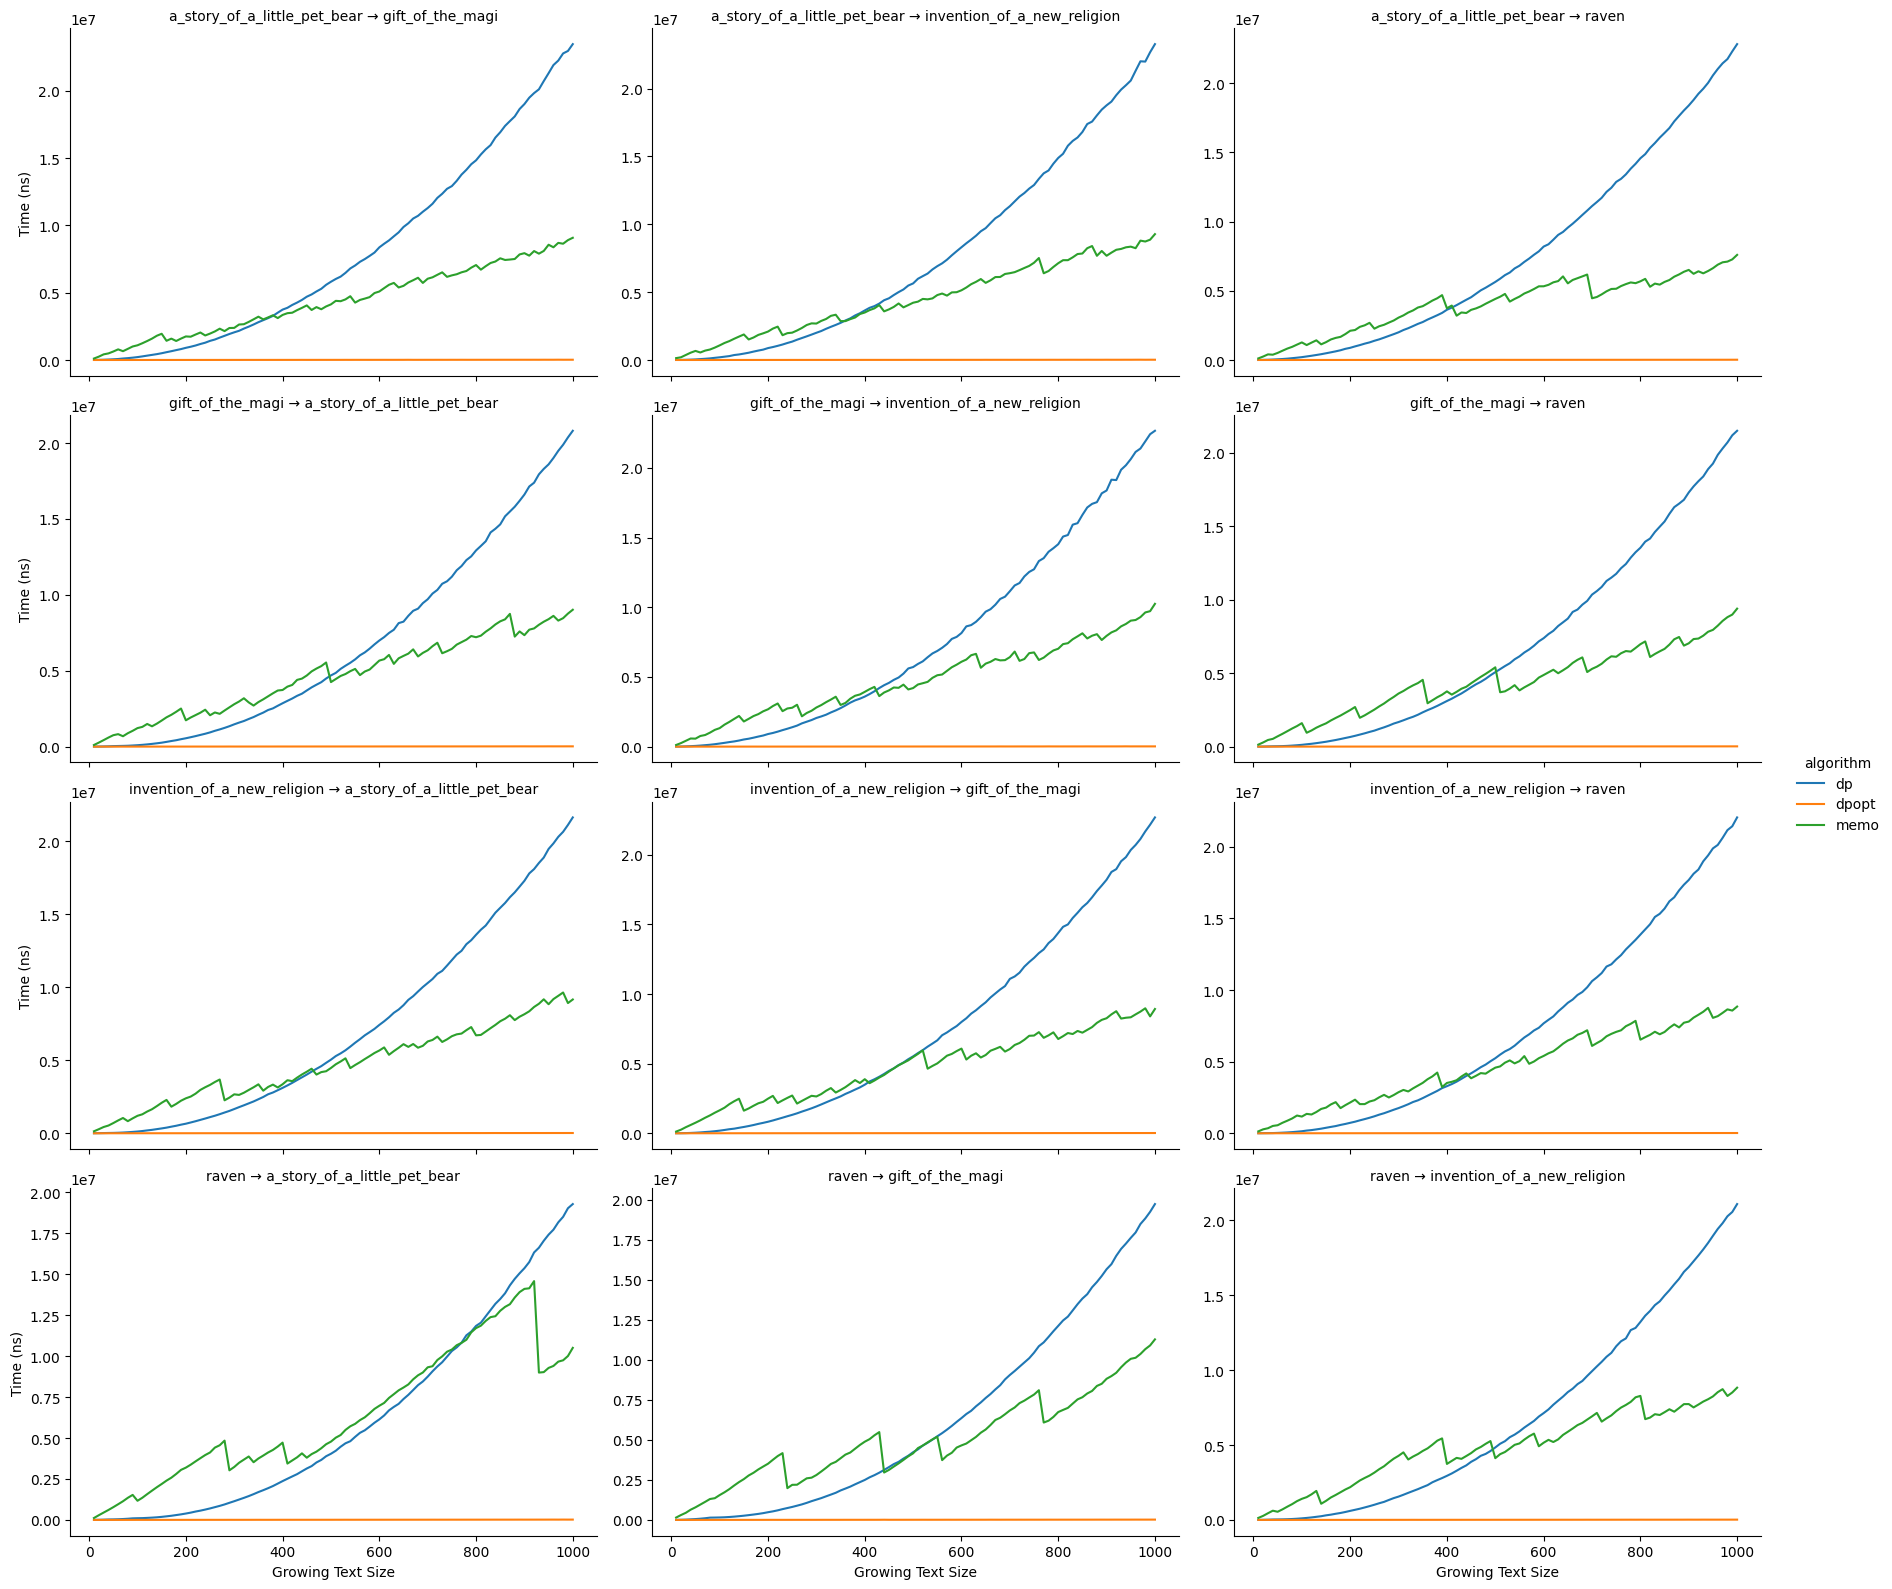

In [28]:
g = sns.FacetGrid(
    aggregated,
    col="text_pair",
    col_wrap=3,
    hue="algorithm",
    sharey=False,
    height=4,
    aspect=1.5
)
g.map_dataframe(sns.lineplot, x="growing_text_size", y="time_mean", errorbar=None).add_legend()

#for ax, (facet_name, subdf) in zip(g.axes.flat, aggregated.groupby("text_pair")):
#    for algo, algo_df in subdf.groupby("algorithm"):
#        ax.errorbar(
#            algo_df["growing_text_size"],
#            algo_df["time_mean"],
#            yerr=algo_df["time_std"],
#            fmt="none",
#            capsize=3,
#            elinewidth=1.2,
#            alpha=0.8,
#            zorder=10,
#            label=None
#        )

g.set_axis_labels("Growing Text Size", "Time (ns)")
g.set_titles(col_template="{col_name}")
g.tight_layout()

plt.savefig("plot.pdf", format="pdf", bbox_inches="tight")
plt.show()